In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def linear_interpolation(x, y, x_new):
    # Convert lists to numpy arrays for easier manipulation
    x = np.array(x)
    y = np.array(y)

    # Ensure that x_new is within the range of x
    if x_new < np.min(x) or x_new > np.max(x):
        raise ValueError("x_new is out of bounds of x.")

    # Find indices of the two closest values in x that bound x_new
    idx = np.searchsorted(x, x_new)
    
    # Handle edge case where x_new matches exactly the smallest or largest x value
    if x_new == x[idx - 1]:
        return y[idx - 1]
    elif x_new == x[idx]:
        return y[idx]

    # Get the two x and y values surrounding x_new
    x0, x1 = x[idx - 1], x[idx]
    y0, y1 = y[idx - 1], y[idx]

    # Perform linear interpolation
    y_new = y0 + (y1 - y0) * (x_new - x0) / (x1 - x0)

    return y_new

In [6]:
folder = "/home/users/o/oleksiyu/WORK/hyperproject/twinturbo/workspaces/DOPING/TRANSITv1_dopings"
dopings = [50, 100, 333, 500, 667, 1000, 3000]


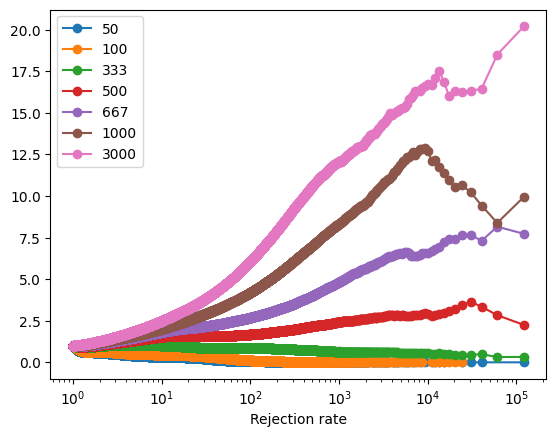

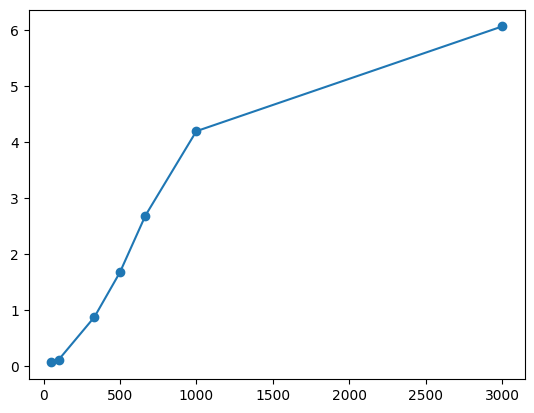

In [21]:
rej_target = 100
SIs = []
for doping in dopings:
    SI_curve_file = f"{folder}/run-doping_{doping}/plots/compare/TwinTurbo_SI_v_rej_comb_seeds_CWOLA.npy"
    SI_rej = np.load(SI_curve_file)
    rej_inv = SI_rej[0]
    SI = SI_rej[1]
    plt.plot(rej_inv, SI, marker='o', label=f"{doping}")
    SIs.append(linear_interpolation(rej_inv, SI, rej_target))

plt.xlabel("Rejection rate")
plt.xscale('log')
plt.legend()
plt.figure()
plt.plot(dopings, SIs, marker='o')
    


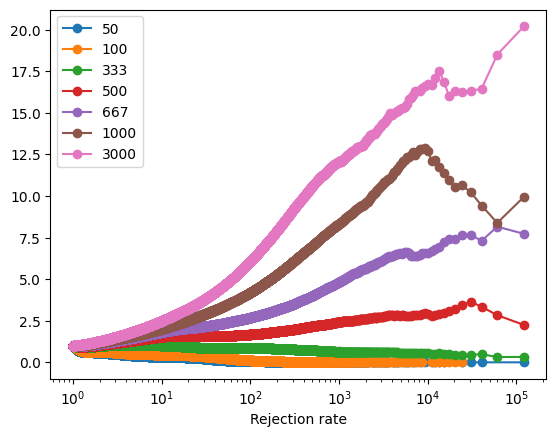

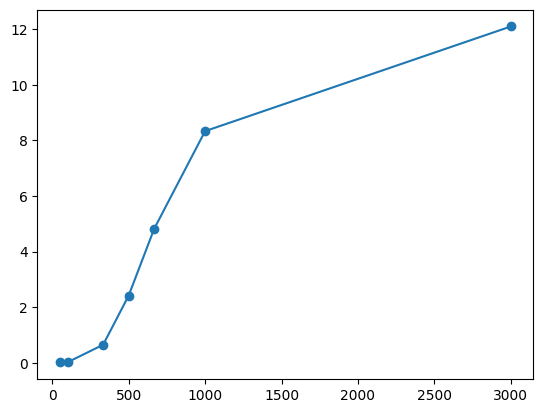

In [22]:
rej_target = 1000
SIs = []
for doping in dopings:
    SI_curve_file = f"{folder}/run-doping_{doping}/plots/compare/TwinTurbo_SI_v_rej_comb_seeds_CWOLA.npy"
    SI_rej = np.load(SI_curve_file)
    rej_inv = SI_rej[0]
    SI = SI_rej[1]
    plt.plot(rej_inv, SI, marker='o', label=f"{doping}")
    SIs.append(linear_interpolation(rej_inv, SI, rej_target))

plt.xlabel("Rejection rate")
plt.xscale('log')
plt.legend()
plt.figure()
plt.plot(dopings, SIs, marker='o')